# Part A.

In a study of memory processes, animals were tested in a one-trial avoidance-learning task. The animals were presented with a fear-producing stimulus on the learning trial as soon as they stepped across a line in the test chamber. The dependent variable was the time it took them to step across the line on the test trial. Three groups of animals differed in terms of the area in which they had electrodes implanted in their cortex (Neutral site, Area A, or Area B). Each group was further divided and given electrical stimulation 50, 100, or 150 milliseconds after crossing the line and being presented with the fear-inducing stimulus. If the brain area that was stimulated is involved in memory, stimulation would be expected to interfere with memory consolidation and retard learning of the avoidance response, and the animal should not show any hesitancy in recrossing the line. The data on latency to recross the line are as follows:

<img src="p9.png" width="600"/>

The data are found in https://github.com/amanirad/Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics.

- Run the appropriate analysis of variance and state your conclusions and interpret the results.
- Use the Bonferroni test to compare the neutral site to each of the other areas, ignoring the length of stimulation. 
- Use simple effects to examine the effect of delay of stimulation in area A for the data.

In [4]:
library(rstatix)
library(ggpubr)

In [3]:
learning_data = read.table("C://Users//Saeed//Desktop//Amar//Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics-main//project_1.dat", header = TRUE)

In [8]:
learning_data

Area,Duration,Time
<chr>,<chr>,<int>
Neutral,Short,25
Neutral,Short,30
Neutral,Short,28
Neutral,Short,40
Neutral,Short,20
Neutral,Moderate,30
Neutral,Moderate,25
Neutral,Moderate,27
Neutral,Moderate,35


In [6]:
learning_data = learning_data %>% mutate (Area = ifelse (Area == "1", "Neutral", ifelse(Area == "2", "AreaA", "AreaB")))

In [7]:
learning_data = learning_data %>% mutate (Duration = ifelse (Duration == "1", "Short", ifelse(Duration == "2", "Moderate" , "Long")))

In [8]:
learning_data %>% group_by(Area, Duration) %>% get_summary_stats(Time)

Area,Duration,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AreaA,Long,Time,5,21,35,27,23,28,5,5.930,26.8,5.404,2.417,6.710
AreaA,Moderate,Time,5,19,31,22,20,23,3,2.965,23.0,4.743,2.121,5.890
AreaA,Short,Time,5,11,26,15,14,18,4,4.448,16.8,5.718,2.557,7.100
AreaB,Long,Time,5,21,30,28,23,30,7,2.965,26.4,4.159,1.860,5.164
AreaB,Moderate,Time,5,9,24,16,13,18,5,4.448,16.0,5.612,2.510,6.969
AreaB,Short,Time,5,18,30,23,23,28,5,7.413,24.4,4.722,2.112,5.863
Neutral,Long,Time,5,20,35,28,26,31,5,4.448,28.0,5.612,2.510,6.969
Neutral,Moderate,Time,5,23,35,27,25,30,5,4.448,28.0,4.690,2.098,5.824
Neutral,Short,Time,5,20,40,28,25,30,5,4.448,28.6,7.403,3.311,9.192


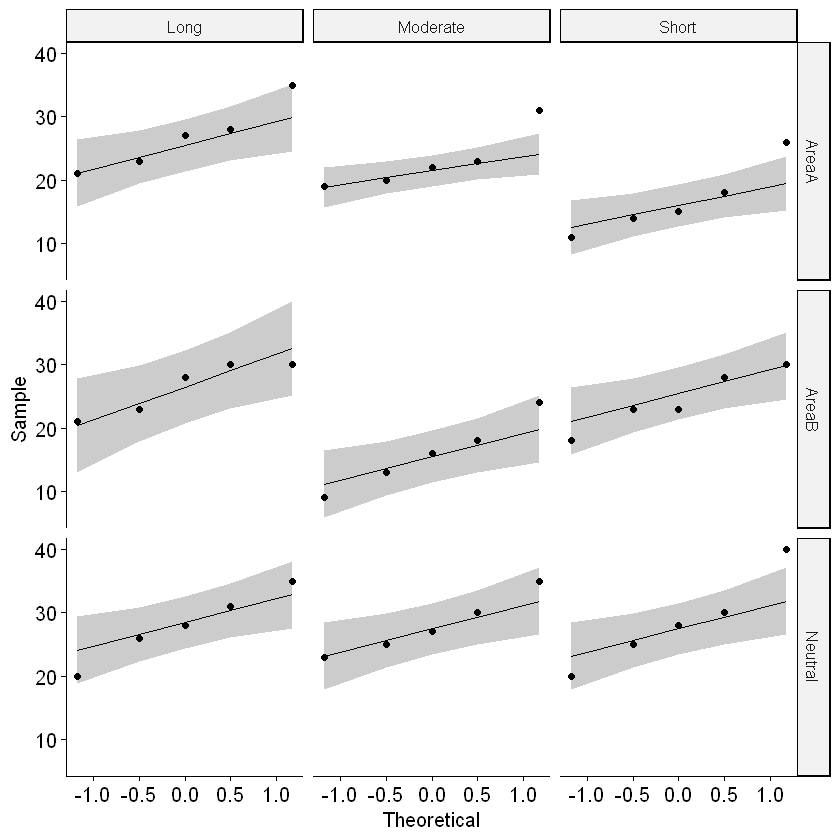

In [159]:
ggqqplot(learning_data, "Time") + facet_grid(Area ~ Duration)

In [9]:
learning_data %>% group_by(Area, Duration) %>% identify_outliers(Time)

Area,Duration,Time,is.outlier,is.extreme
<chr>,<chr>,<int>,<lgl>,<lgl>
AreaA,Moderate,31,TRUE,FALSE
AreaA,Short,26,TRUE,FALSE
Neutral,Short,40,TRUE,FALSE


In [8]:
learning_data %>% group_by(Area, Duration) %>% shapiro_test(Time)

Area,Duration,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
AreaA,Long,Time,0.9460349,0.7088551
AreaA,Moderate,Time,0.8409519,0.1675703
AreaA,Short,Time,0.9141809,0.4931178
AreaB,Long,Time,0.8504109,0.1958209
AreaB,Moderate,Time,0.9913625,0.9842414
AreaB,Short,Time,0.9452666,0.7033700
Neutral,Long,Time,0.9913625,0.9842414
Neutral,Moderate,Time,0.9581566,0.7950916
Neutral,Short,Time,0.9591148,0.8018062


In [15]:
learning_data %>% levene_test(Time ~ Area* Duration)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
8,36,0.1355422,0.9970647


In [18]:
learning_data %>% anova_test(Time ~ Area * Duration)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Area,2,36,6.074,0.005,*,0.252
2,Duration,2,36,3.217,0.052,,0.152
3,Area:Duration,4,36,3.172,0.025,*,0.261


In [11]:
learning_data %>% group_by(Area) %>% anova_test(Time ~ Duration) %>% adjust_pvalue (method = "bonferroni")

Area,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
AreaA,Duration,2,12,4.528,0.034,*,0.430,0.102
AreaB,Duration,2,12,6.425,0.013,*,0.517,0.039
Neutral,Duration,2,12,0.017,0.984,,0.003,1.000


In [12]:
learning_data %>% group_by(Duration) %>% anova_test(Time ~ Area) %>% adjust_pvalue (method = "bonferroni")

Duration,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Long,Area,2,12,0.133,0.876,,0.022,1.000
Moderate,Area,2,12,7.171,0.009,*,0.544,0.027
Short,Area,2,12,4.887,0.028,*,0.449,0.084


In [9]:
learning_data %>% group_by(Duration) %>% emmeans_test(Time ~ Area, p.adjust.method = "bonferroni")

,Duration,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Long,Area,Time,AreaA,AreaB,36,0.1168191,0.907652697,1.000000000,ns
2,Long,Area,Time,AreaA,Neutral,36,-0.3504573,0.728037926,1.000000000,ns
3,Long,Area,Time,AreaB,Neutral,36,-0.4672764,0.643118245,1.000000000,ns
4,Moderate,Area,Time,AreaA,AreaB,36,2.0443342,0.048287184,0.144861551,ns
5,Moderate,Area,Time,AreaA,Neutral,36,-1.4602387,0.152897216,0.458691648,ns
6,Moderate,Area,Time,AreaB,Neutral,36,-3.5045730,0.001243002,0.003729006,**
7,Short,Area,Time,AreaA,AreaB,36,-2.2195629,0.032836378,0.098509134,ns
8,Short,Area,Time,AreaA,Neutral,36,-3.4461634,0.001462476,0.004387428,**
9,Short,Area,Time,AreaB,Neutral,36,-1.2266005,0.227935062,0.683805185,ns


In [10]:
library(emmeans)

In [11]:
model = aov(Time ~ Area * Duration, data = learning_data)
emm_results = emmeans(model, ~ Duration | Area)


print(emm_results)


pairwise_results = pairs(emm_results, adjust = "tukey")


print(pairwise_results)


Area = AreaA:
 Duration emmean   SE df lower.CL upper.CL
 Long       26.8 2.42 36     21.9     31.7
 Moderate   23.0 2.42 36     18.1     27.9
 Short      16.8 2.42 36     11.9     21.7

Area = AreaB:
 Duration emmean   SE df lower.CL upper.CL
 Long       26.4 2.42 36     21.5     31.3
 Moderate   16.0 2.42 36     11.1     20.9
 Short      24.4 2.42 36     19.5     29.3

Area = Neutral:
 Duration emmean   SE df lower.CL upper.CL
 Long       28.0 2.42 36     23.1     32.9
 Moderate   28.0 2.42 36     23.1     32.9
 Short      28.6 2.42 36     23.7     33.5

Confidence level used: 0.95 
Area = AreaA:
 contrast         estimate   SE df t.ratio p.value
 Long - Moderate       3.8 3.42 36   1.110  0.5144
 Long - Short         10.0 3.42 36   2.920  0.0161
 Moderate - Short      6.2 3.42 36   1.811  0.1805

Area = AreaB:
 contrast         estimate   SE df t.ratio p.value
 Long - Moderate      10.4 3.42 36   3.037  0.0120
 Long - Short          2.0 3.42 36   0.584  0.8295
 Moderate - Short     

In [12]:
testresult = learning_data %>% group_by(Duration) %>% emmeans_test(Time ~ Area, p.adjust.method = "bonferroni")

In [13]:
learningbox = ggboxplot(learning_data, x = "Duration", y = "Time", color = "Area")

In [14]:
testresult = testresult %>% add_xy_position("Duration")

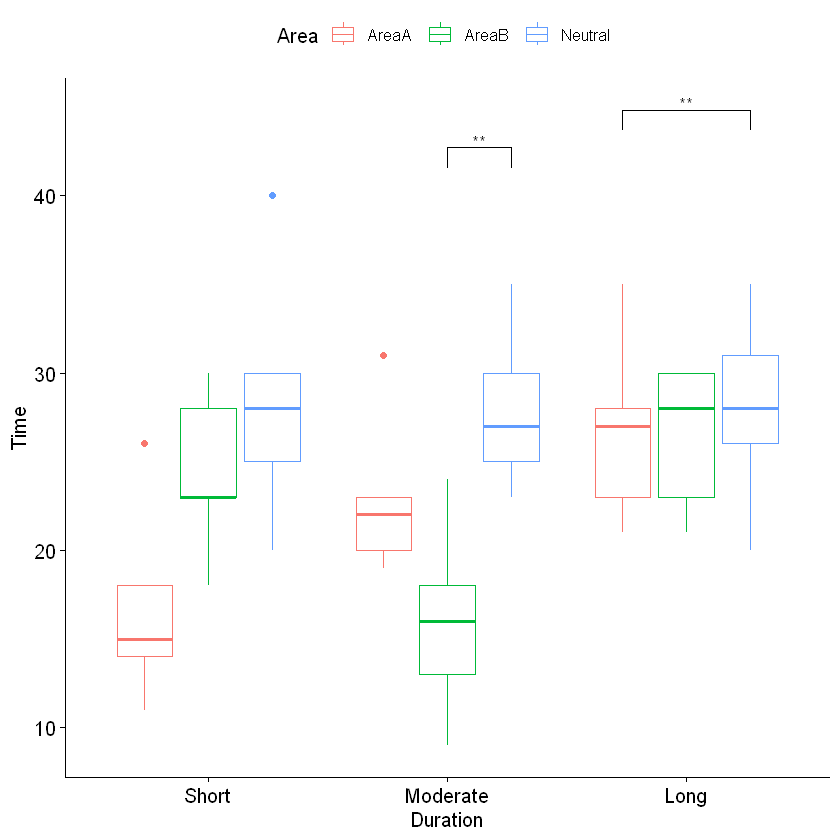

In [15]:
learningbox + stat_pvalue_manual(testresult, hide.ns = TRUE)

In [79]:
learning_data %>% cohens_d(Time~ Area)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Time,AreaA,AreaB,-0.01026364,15,15,negligible
2,Time,AreaA,Neutral,-0.99080305,15,15,large
3,Time,AreaB,Neutral,-0.98145231,15,15,large


In [80]:
learning_data %>% cohens_d(Time~ Duration)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Time,Short,Moderate,0.1290642,15,15,negligible
2,Time,Short,Long,-0.6019445,15,15,moderate
3,Time,Moderate,Long,-0.7975335,15,15,moderate


# Answer:
#### After preprocessing the data, its obvious that we have all the presuppositions needed to do parametric hypo tests, the two way classic ANOVA exam shows that Area-Duration colaboration is significantlly meaningful, but it also reports that Area variable itself, alone has significance towards learing rate, but duration alone, does not. We continue with post hoc tests starting with one way ANOVA, which also shows that AreaA with 50ms of stimulation has significant difference, and also AreaB stimulaton with moderate duration also has significant difference, control group has no significancy. And at last we go one level further down and take multiple alpha value adjusted t tests, which shows that specifically AreaA with 50ms stimulation is meaningful in comparison with sham group, which is also true about AreaB with 100ms stimulation, which is meaningful in comparison with sham group. and other colaborations are not. Effect size computation report with Cohen's d also shows that the two Area A with 50ms and Area B with 100ms stimulation both in comparison with control group have large magnitude of effect size, which makes us sure in order to report the colaboration found in this examination. I believe that I have answered the second question of the Part A within the explanation provided above.

# Part B. 
Three researchers ran a study comparing different treatments for posttraumatic stress disorder (PTSD). They used three groups (plus a waiting list control). One group received Stress Inoculation Therapy (SIT), another received a Prolonged Exposure (PE) treatment, and a third received standard Supportive Counseling (SC). All clients were measured at Pretreatment, Posttreatment, and a 3.5-month Follow-up. The data below closely approximate the data that they collected, and the dependent variable is a measure of PTSD.

<img src="p10.png" width="600"/>

- Run a repeated measures analysis of variance on these data. Draw the appropriate conclusions.
- Run a mixed models analysis of variance, specifying an appropriate form for the covariance matrix, and compare the results with those you obtained above.

In [15]:
library(readxl)
library(rstatix)
library(ggpubr)

In [16]:
ptsd_data = read_excel("C://Users//Saeed//Desktop//ptsd_data.xlsx")

In [17]:
ptsd_data

Method,Test,Measure,id
<chr>,<chr>,<dbl>,<dbl>
SIT,pre,19,1
SIT,pre,28,2
SIT,pre,18,3
SIT,pre,23,4
SIT,pre,21,5
SIT,pre,24,6
SIT,pre,26,7
SIT,pre,15,8
SIT,pre,18,9


In [18]:
ptsd_data %>% group_by(Method, Test) %>% get_summary_stats(Measure, type = "mean_sd")

Method,Test,variable,n,mean,sd
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
PE,followup,Measure,15,10.933,7.535
PE,post,Measure,15,14.400,9.202
PE,pre,Measure,15,25.000,4.721
SC,followup,Measure,15,17.200,7.043
SC,post,Measure,15,19.800,5.697
SC,pre,Measure,15,24.667,5.300
SIT,followup,Measure,15,12.400,9.448
SIT,post,Measure,15,9.800,4.092
SIT,pre,Measure,15,24.267,6.170


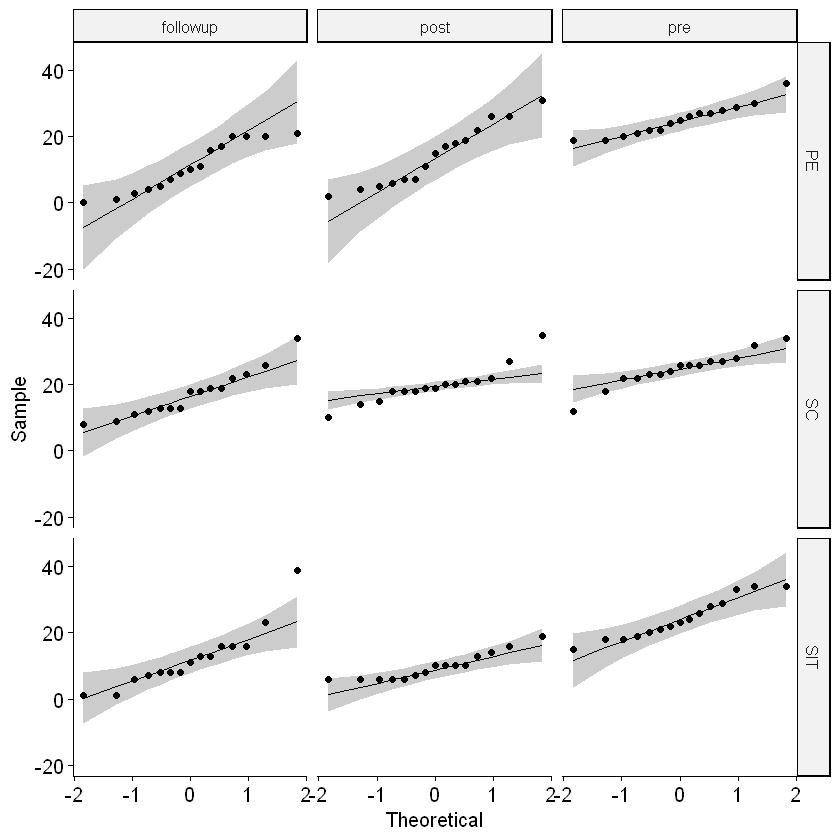

In [19]:
ggqqplot(ptsd_data, "Measure") + facet_grid(Method~Test)

In [20]:
ptsd_data %>% group_by(Method, Test) %>% identify_outliers(Measure)

Method,Test,Measure,id,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
SC,followup,34,7,TRUE,FALSE
SC,post,35,7,TRUE,TRUE
SC,post,10,9,TRUE,FALSE
SC,post,27,11,TRUE,FALSE
SC,pre,12,1,TRUE,FALSE
SC,pre,34,11,TRUE,FALSE
SIT,followup,39,14,TRUE,FALSE


In [21]:
ptsd_data %>% group_by(Method, Test) %>% shapiro_test(Measure)

Method,Test,variable,statistic,p
<chr>,<chr>,<chr>,<dbl>,<dbl>
PE,followup,Measure,0.9066639,0.12036543
PE,post,Measure,0.9355783,0.33000763
PE,pre,Measure,0.9433104,0.42582430
SC,followup,Measure,0.9320402,0.29265792
SC,post,Measure,0.8898863,0.06679420
SC,pre,Measure,0.9459071,0.46244231
SIT,followup,Measure,0.8594653,0.02370838
SIT,post,Measure,0.8607188,0.02471639
SIT,pre,Measure,0.9334535,0.30710484


In [22]:
ptsd_data %>% group_by(Test) %>%  levene_test(Measure~Method)

Warning message:
"There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(.data$data, .f, ...)`.
Caused by warning in `leveneTest.default()`:
! group coerced to factor.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."


Test,df1,df2,statistic,p
<chr>,<int>,<int>,<dbl>,<dbl>
followup,2,42,0.1788569,0.836859150
post,2,42,6.5463507,0.003351658
pre,2,42,0.6794837,0.512362737


In [23]:
box_m(ptsd_data[, "Measure", drop = FALSE], ptsd_data$Method)

statistic,p.value,parameter,method
<dbl>,<dbl>,<dbl>,<chr>
5.962123,0.05073894,2,Box's M-test for Homogeneity of Covariance Matrices


In [24]:
anova_test(data = ptsd_data, dv = Measure, wid = id, within  =  c(Test, Method))

ANOVA Table (type III tests)

$ANOVA
       Effect DFn DFd      F        p p<.05   ges
1        Test   2  28 82.447 1.84e-12     * 0.366
2      Method   2  28  4.263 2.40e-02     * 0.096
3 Test:Method   4  56  4.070 6.00e-03     * 0.072

$`Mauchly's Test for Sphericity`
       Effect     W     p p<.05
1        Test 0.903 0.516      
2      Method 0.869 0.400      
3 Test:Method 0.262 0.057      

$`Sphericity Corrections`
       Effect   GGe      DF[GG]    p[GG] p[GG]<.05   HFe      DF[HF]    p[HF]
1        Test 0.912 1.82, 25.53 1.53e-11         * 1.041 2.08, 29.15 1.84e-12
2      Method 0.884 1.77, 24.75 3.00e-02         * 1.002    2, 28.06 2.40e-02
3 Test:Method 0.689 2.75, 38.56 1.50e-02         * 0.874  3.5, 48.94 9.00e-03
  p[HF]<.05
1         *
2         *
3         *

In [25]:
anova_test(data = ptsd_data, dv = Measure, wid = id, between = Method ,within  =  Test)

Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"


ANOVA Table (type II tests)

$ANOVA
       Effect DFn DFd      F        p p<.05   ges
1      Method   2  42  3.525 3.80e-02     * 0.096
2        Test   2  84 66.374 5.12e-18     * 0.366
3 Method:Test   4  84  4.466 3.00e-03     * 0.072

$`Mauchly's Test for Sphericity`
       Effect    W     p p<.05
1        Test 0.73 0.002     *
2 Method:Test 0.73 0.002     *

$`Sphericity Corrections`
       Effect   GGe      DF[GG]    p[GG] p[GG]<.05   HFe      DF[HF]    p[HF]
1        Test 0.787 1.57, 66.14 1.08e-14         * 0.813 1.63, 68.27 4.33e-15
2 Method:Test 0.787 3.15, 66.14 6.00e-03         * 0.813 3.25, 68.27 5.00e-03
  p[HF]<.05
1         *
2         *

#### The mixed model and repeated measure analysis of variances was performed, both show significant difference between method of procedure(Pe,SC,SIT) and time of measure(Pre,Post,follow) have meaningful collaboration. whilst its of importance to note that, method of procedure is naturally a between group variable while the time of measure is a within group variable, so technically we should perform a mixded model of variance analysis and not a repeated measure one.

# Post-hoc tests

In [26]:
ptsd_data %>% group_by(Test) %>% anova_test(dv = Measure, wid = id, between = Method) %>% get_anova_table() %>% adjust_pvalue (method = "bonferroni")

Warning message:
"There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(.data$data, .f, ...)`.
Caused by warning:
! The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."


Test,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
followup,Method,2,42,2.471,0.097000,,0.105,0.291000
post,Method,2,42,8.421,0.000841,*,0.286,0.002523
pre,Method,2,42,0.069,0.934000,,0.003,1.000000


In [59]:
ptsd_data %>% group_by(Method) %>% anova_test(dv = Measure, wid = id, within = Test) %>% get_anova_table() %>% adjust_pvalue (method = "bonferroni")

Method,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
PE,Test,2.00,28.00,28.745,1.63e-07,*,0.413,4.89e-07
SC,Test,1.12,15.67,10.267,5.00e-03,*,0.218,1.50e-02
SIT,Test,1.18,16.59,32.796,1.41e-05,*,0.469,4.23e-05


#### One way anova with adjusted p value was performed as post hoc test, twice, once with between group variable fixed, and once with within group variable fixed, the results show that only comparison of post test results' means had significancy no matter the method of procedure, but when time of measure was fixed, all of the three methods of procedure had significancy in alpha level of 0.05. 

In [12]:
ptsd_data %>% group_by(Test) %>% pairwise_t_test(Measure ~ Method, p.adjust.method = "bonferroni")

,Test,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,followup,Measure,PE,SC,15,15,0.039500,*,0.118000,ns
2,followup,Measure,PE,SIT,15,15,0.622000,ns,1.000000,ns
3,followup,Measure,SC,SIT,15,15,0.111000,ns,0.333000,ns
4,post,Measure,PE,SC,15,15,0.032300,*,0.097000,ns
5,post,Measure,PE,SIT,15,15,0.066300,ns,0.199000,ns
6,post,Measure,SC,SIT,15,15,0.000185,***,0.000556,***
7,pre,Measure,PE,SC,15,15,0.867000,ns,1.000000,ns
8,pre,Measure,PE,SIT,15,15,0.713000,ns,1.000000,ns
9,pre,Measure,SC,SIT,15,15,0.841000,ns,1.000000,ns


### the last step would be to find out of two groups specifically have significant difference, the only significancy reported is in between PE and SC methods of procedure comparing their Post test results. 

In [13]:
ptsd_data %>% group_by(Method) %>% pairwise_t_test(Measure ~ Test, paired = TRUE, p.adjust.method = "bonferroni")

,Method,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,PE,Measure,followup,post,15,15,-1.693738,14,1.12e-01,3.36e-01,ns
2,PE,Measure,followup,pre,15,15,-7.313226,14,3.83e-06,1.15e-05,****
3,PE,Measure,post,pre,15,15,-5.815838,14,4.48e-05,1.34e-04,***
4,SC,Measure,followup,post,15,15,-2.356691,14,3.40e-02,1.00e-01,ns
5,SC,Measure,followup,pre,15,15,-3.259854,14,6.00e-03,1.70e-02,*
6,SC,Measure,post,pre,15,15,-3.501232,14,4.00e-03,1.10e-02,*
7,SIT,Measure,followup,post,15,15,1.381699,14,1.89e-01,5.67e-01,ns
8,SIT,Measure,followup,pre,15,15,-4.737232,14,3.18e-04,9.54e-04,***
9,SIT,Measure,post,pre,15,15,-14.015635,14,1.25e-09,3.75e-09,****


### Comparison of all the methods of procedure in pre and post times of measure shows significancy which means that the procedures were consistant through time.

In [32]:
tres1 = ptsd_data %>% group_by(Test) %>% pairwise_t_test(Measure ~ Method, paired = TRUE, p.adjust.method = "bonferroni")

In [51]:
tres2 = ptsd_data %>% group_by(Method) %>% pairwise_t_test(Measure ~ Test, paired = TRUE, p.adjust.method = "bonferroni")

In [46]:
bxp1 = ggboxplot(ptsd_data, x= "Test", y = "Measure", color = "Method")

In [49]:
tres1 = tres1 %>% add_xy_position(x = "Test")

In [52]:
tres2 = tres2 %>% add_xy_position(x = "Test")

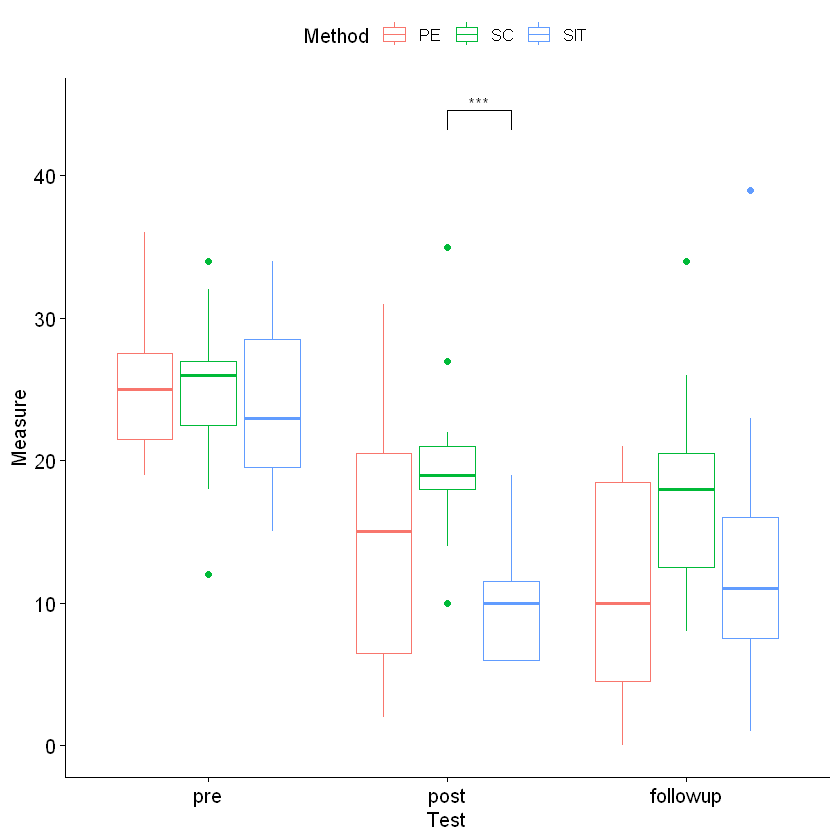

In [55]:
bxp1 + stat_pvalue_manual(tres1, hide.ns = TRUE)

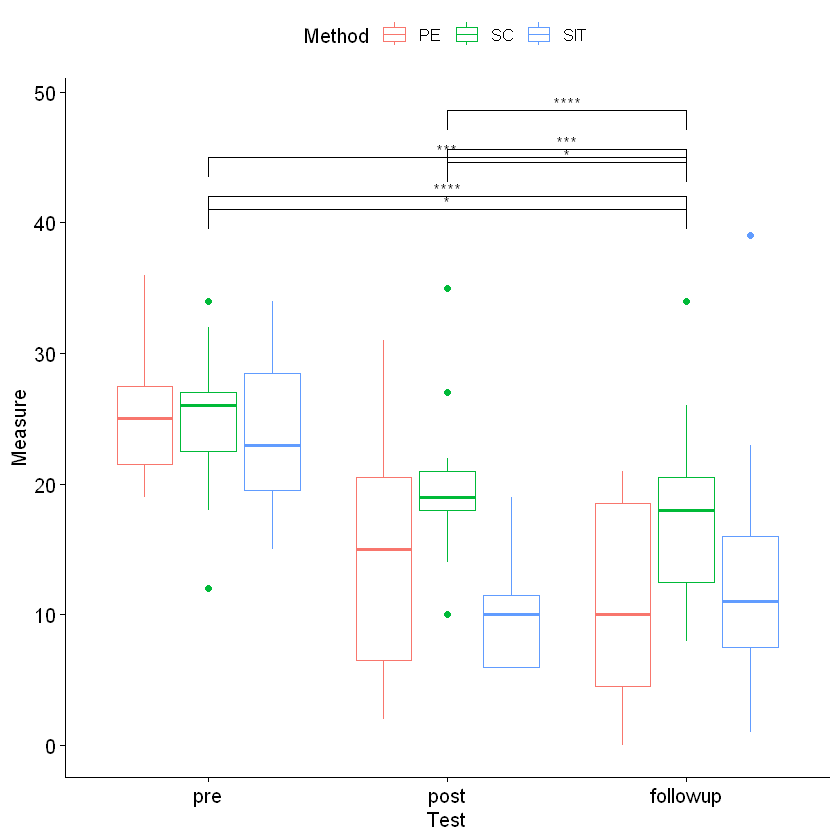

In [54]:
bxp1 + stat_pvalue_manual(tres2, hide.ns = TRUE)

- The following data come from above data with some observations deleted. (An entry of “999” represents a missing observation.)

<img src="p11.png" width="600"/>

    - Analyze these data using a standard repeated measures analysis of variance.
    - How do your results differ from the results you found above.
    - Now analyze the new data using a mixed models approach withan appropriate form for the covariance matrix. How do those results differ from the results you found above?


In [4]:
library(readxl)
library(ggpubr)

Loading required package: ggplot2



In [5]:
ptsd_na_data = read_excel("C://Users//Saeed//Desktop//ptsd_na_data.xlsx")

In [6]:
ptsd_na_data$Measure = as.double(ptsd_na_data$Measure)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [7]:
ptsd_na_data

Method,Test,Measure,id
<chr>,<chr>,<dbl>,<dbl>
SIT,pre,19,1
SIT,pre,28,2
SIT,pre,18,3
SIT,pre,NA,4
SIT,pre,21,5
SIT,pre,24,6
SIT,pre,26,7
SIT,pre,15,8
SIT,pre,18,9


In [9]:
ptsd_na_data %>% group_by(Method, Test) %>% get_summary_stats(Measure)

Method,Test,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PE,followup,Measure,13,0,21,11.0,7.00,20.00,13.00,11.861,11.923,7.632,2.117,4.612
PE,post,Measure,13,4,31,15.0,7.00,22.00,15.00,11.861,14.846,8.924,2.475,5.393
PE,pre,Measure,14,19,36,25.5,22.00,27.75,5.75,5.189,25.286,4.762,1.273,2.750
SC,followup,Measure,13,8,34,13.0,12.00,19.00,7.00,7.413,16.385,7.240,2.008,4.375
SC,post,Measure,13,10,35,19.0,18.00,21.00,3.00,2.965,19.308,5.765,1.599,3.484
SC,pre,Measure,15,12,34,26.0,22.50,27.00,4.50,4.448,24.667,5.300,1.369,2.935
SIT,followup,Measure,13,1,39,11.0,8.00,16.00,8.00,7.413,12.538,10.030,2.782,6.061
SIT,post,Measure,14,6,19,9.0,6.00,12.25,6.25,4.448,9.786,4.246,1.135,2.451
SIT,pre,Measure,14,15,34,23.0,19.25,28.75,9.50,7.413,24.357,6.392,1.708,3.691


In [8]:
anova_test(data = ptsd_na_data, dv = Measure, wid = id, within  =  c(Test, Method))

ERROR: Error in anova_test(data = ptsd_na_data, dv = Measure, wid = id, within = c(Test, : could not find function "anova_test"


In [24]:
ptsd_na_data %>% anova_test(dv = Measure, wid = id, between = Method, within = Test)

Warning message:
"NA detected in rows: 4,26,37,41,47,62,65,83,84,108,116,128,131.
Removing this rows before the analysis."
Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"


ANOVA Table (type III tests)

$ANOVA
       Effect DFn DFd      F        p p<.05   ges
1      Method   2  32  1.604 2.17e-01       0.059
2        Test   2  64 45.589 4.91e-13     * 0.348
3 Method:Test   4  64  3.669 9.00e-03     * 0.079

$`Mauchly's Test for Sphericity`
       Effect     W        p p<.05
1        Test 0.639 0.000977     *
2 Method:Test 0.639 0.000977     *

$`Sphericity Corrections`
       Effect   GGe      DF[GG]    p[GG] p[GG]<.05   HFe      DF[HF]    p[HF]
1        Test 0.735 1.47, 47.04 3.55e-10         * 0.762 1.52, 48.75 1.83e-10
2 Method:Test 0.735 2.94, 47.04 1.90e-02         * 0.762 3.05, 48.75 1.80e-02
  p[HF]<.05
1         *
2         *

In [27]:
ptsd_na_data %>% group_by(Method) %>% anova_test(dv = Measure, wid = id, within = Test) %>% get_anova_table %>% adjust_pvalue(method = "bonferroni")

Warning message:
"There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(.data$data, .f, ...)`.
Caused by warning:
! NA detected in rows: 4,26,37,41.
Removing this rows before the analysis.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."


Method,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
PE,Test,2.00,20.00,22.368,7.92e-06,*,0.433,2.376e-05
SC,Test,1.11,12.22,6.198,2.60e-02,*,0.197,7.800e-02
SIT,Test,1.18,12.96,22.617,2.48e-04,*,0.426,7.440e-04


#### Answer: The difference observed here between the casual data and the dataset that has deleted data, shows that the colaboration of times of measure and methods of procedure is still significant but the significancy of Methods of procedure alone is disturbed now.

In [29]:
ptsd_na_data %>% group_by(Test) %>% anova_test(dv = Measure, wid = id, between = Method) %>% get_anova_table %>% adjust_pvalue(method = "bonferroni")

Warning message:
"There were 6 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map(.data$data, .f, ...)`.
Caused by warning:
! NA detected in rows: 4,17.
Removing this rows before the analysis.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 5 remaining warnings."


Test,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
followup,Method,2,36,1.079,0.351,,0.057,1.000
post,Method,2,37,7.140,0.002,*,0.278,0.006
pre,Method,2,40,0.103,0.903,,0.005,1.000


In [34]:
ptsd_na_data %>% group_by(Method) %>% pairwise_t_test(Measure ~ Test, paired = TRUE, p.adjust.method = "bonferroni")

,Method,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,PE,Measure,followup,post,13,13,-1.954340,10,7.90e-02,2.38e-01,ns
2,PE,Measure,followup,pre,13,14,-7.275199,11,1.59e-05,4.77e-05,****
3,PE,Measure,post,pre,13,14,-6.305841,12,3.91e-05,1.17e-04,***
4,SC,Measure,followup,post,13,13,-1.811535,11,9.70e-02,2.92e-01,ns
5,SC,Measure,followup,pre,13,15,-2.839464,12,1.50e-02,4.50e-02,*
6,SC,Measure,post,pre,13,15,-2.927532,12,1.30e-02,3.80e-02,*
7,SIT,Measure,followup,post,13,14,1.307004,12,2.16e-01,6.48e-01,ns
8,SIT,Measure,followup,pre,13,14,-3.944239,11,2.00e-03,7.00e-03,**
9,SIT,Measure,post,pre,14,14,-13.003332,12,1.97e-08,5.91e-08,****


#### The rest of the results reported are similar between the disturbed dataset and the normal one.